In [10]:
import tweepy, codecs
import os
import pandas as pd
import numpy as np
import re  # Regular Expression lib 
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# Natural Language Tool Kit
import nltk 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# To install the package 
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org wordcloud

In [6]:
# To install the package 
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org tweepy

In [19]:
# https://apps.twitter.com/app/6270442/show
## fill in your Twitter credentials 
consumer_key = "vcGzzq84HF39zrTvJCzfyByut"
consumer_secret = "PY24G6RLIzcBR2jKKt25LswML65abTELjZnCVSX8o6JgpCbair"
access_token = "1050635730-8lOq26TMGjKvKj4OYVpZ2N2Z7sxJEZzceMjEBVC"
access_token_secret = "V3QANATiXI8AmGRKlyfKhQsxCfTqpiNmYxvbLbdUWhAJY"

In [20]:
## let Tweepy set up an instance of the REST API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Successful execution of this command means that connection between Twitter and Python is there. 

In [5]:
## fill in your search query and store your results in a variable
results = api.search(q = "Covid 19", lang = "en", result_type = "recent", count = 1000)
results  # Convert this json ds to a data-frame 

[Status(_api=<tweepy.api.API object at 0x0000000004ED19A0>, _json={'created_at': 'Sat Apr 10 09:14:17 +0000 2021', 'id': 1380811360892678144, 'id_str': '1380811360892678144', 'text': 'RT @Medscape: Neutralizing the virus: Gain important new knowledge around the monoclonal #antibodies (mAbs) that have received EUA for COVI…', 'truncated': False, 'entities': {'hashtags': [{'text': 'antibodies', 'indices': [89, 100]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Medscape', 'name': 'Medscape', 'id': 16892009, 'id_str': '16892009', 'indices': [3, 12]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 73402961, 'id_str': '73402961', 'name': 'İmmortal Seti', 'screen_name': 'angelseti', 'location': 'K

In [6]:
results.count  # How many tweets were recovered

100

In [ ]:
type(result)

In [9]:
## use the codecs library to write the text of the Tweets to a .txt file
file = codecs.open("My_file1.txt", "w", "utf-8")
for result in results:
    file.write(result.text)
    file.write("\n")
file.close()

In [10]:
df1 = pd.read_table("C:\\Users\\anparash\\My_file1.txt")

In [11]:
df1.sample(50)

RT @Medscape: Neutralizing the virus: Gain important new knowledge around the monoclonal #antibodies (mAbs) that have received EUA for COVI…
12   RT @DailyMailUK: All the times Boris Johnson h...                                                                                          
66   us are planning on splitting our time between ...                                                                                          
81   RT @RDH4L3: Imagine if BBC News reporters had ...                                                                                          
99   RT @Kings_BHFCentre: New research from @Giacca...                                                                                          
103  Temporary Guidance for the Endorsement for FHA...                                                                                          
15   RT @IndiaWakesUp_: Take second wave of Covid-1...                                                                                          
34                                                 @B…                                                                                          
134      RT @amazon_sites: @DrRPNishank @narendramodi                                                                                           
89   RT @HumanityWarior7: Meditation works Wonders ...                                                                                          
40                             We request our citizen…                                                                                          
98   simply injecting coronavirus spike proteins in...                                                                                          
60   RT @IFPRI: When it comes to #foodsystems, we d...                                                                                          
126  RT @LukeJohnsonRCP: All the times Boris has mo...                                                                                          
41   RT @CBSNews: "This is so scary": COVID-19 link...                                                                                          
2                               Hum tumko Corona Dega”                                                                                          
94   RT @FollowEmbrace: As we start to see signs of...                                                                                          
78   RT @ABSCBNNews: BREAKING: Presidential Spokesp...                                                                                          
121  RT @rapplerdotcom: LOOK: Vice President Leni R...                                                                                          
90   Practice Pranayam with  Meditation for at leas...                                                                                          
70   RT @WHO: Some #COVID19 💉 have been developed w...                                                                                          
122  The Risks Of Posting Your COVID-19 Vaccine Car...                                                                                          
111  RT @Sumitchauhaan: Information : I was suppose...                                                                                          
88   RT @rapplerdotcom: LOOK: Vice President Leni R...                                                                                          
139  RT @narendramodi: We also reaffirmed commitmen...                                                                                          
68   Practice Pranayam with  Meditation for at leas...                                                                                          
30                                      At : Max Saket                                                                                          
87   RT @vizhpuneet: @aayeff @terence_fdes @tamil19...                                   

In [12]:
pd.set_option('display.max_colwidth', None)
df1.sample(20)

RT @Medscape: Neutralizing the virus: Gain important new knowledge around the monoclonal #antibodies (mAbs) that have received EUA for COVI…
94   RT @FollowEmbrace: As we start to see signs of hope, with the COVID-19 vaccination programme saving lives and opening up new possibilities,…
77                                                                                                                                   #Internalas…
128  RT @CommonsPACAC: We've written to @michaelgove asking him to appear as soon as possible to discuss covid-19 vaccination certification.   h…
52                                                                                                                           Thousands of Israel…
85                                                                                                                                After deleting…
63   RT @CBCToronto: What's behind Ontario's abrupt shift toward vaccinating everyone in COVID-19 hotspots https://t.co/iafyI1AExj https://t.co/…
143  PTI News (Low-income countries received just 0.2 per cent of all COVID-19 shots given: WHO) has been published on P… https://t.co/ickcSW1J1A
69                                          RT @GreaterKashmir: Global #COVID19 tally surpasses 134.5mn | Greater Kashmir https://t.co/HwolMf5J0M
133                              RT @PTI_News: EC asks political parties to observe COVID-19 guidelines issued by it last year in all seriousness
118  @mehouser1 @Graham_Couch The boating fiasco wasn’t good.  I’m a rural guy that fishes.  I haven’t been able to talk… https://t.co/I3qmiLaI7m
53   RT @DCPNewDelhi: Regular announcement is being made by New Delhi District Police outside all major Parks to follow Covid  guidelines issued…
82   RT @EricBellmanWSJ: India's vaccination drive has surpassed America's. @narendramodi calls on states to waste as little and share as much a…
54                                                                      RT @lenakatrine: So apparently, Ivermectin is being sold around like this
61                                                                                                                          @IFPRI's 2021 Global…
44    @diclexicon @buchanan17 Well instead off double checking your data lets use some math guys. https://t.co/xlvchk7Lic https://t.co/dC9WVqt9py
38                                                                                                            Active cases or currently ill pati…
92                                                                                    The mRNA vaccine technology has be… https://t.co/eTDTdK8uwV
15         RT @IndiaWakesUp_: Take second wave of Covid-19 seriously please. The situation is getting worse. Take vaccines if you are eligible! 🙏
76                                                                                     #internalassessment  PLEASE CONDUCT ONLINE EXAM #Covid_19 
125  RT @narendramodi: We also reaffirmed commitment to multilateralism, and agreed to work closely on common global challenges like COVID-19, C…

In [13]:
api.home_timeline("@NarendraModi")

[Status(_api=<tweepy.api.API object at 0x0000000004ED19A0>, _json={'created_at': 'Sat Apr 10 09:10:28 +0000 2021', 'id': 1380810402196414468, 'id_str': '1380810402196414468', 'text': 'आसाम में प्रियंका गांधी जी ने FREE बिजली देने का वादा किया\n \nपंजाब में कैप्टन अमरिंदर सिंह ने महिलाओं के लिए FREE ब… https://t.co/ihHxae6KVF', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ihHxae6KVF', 'expanded_url': 'https://twitter.com/i/web/status/1380810402196414468', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 711694309, 'id_str': '711694309', 'name': 'AAP', 'screen_name': 'AamAadmiParty', 'location': 'India', 'description': 'भ्रष्टाचार मुक्त भार

In [16]:
# Which hashtag is trending in delhi 
# 20070458
#api.trends_place("20070458")

# Which hashtag is trending in India 
#23424848
api.trends_place("23424848")

[{'trends': [{'name': '#Clubhouse',
    'url': 'http://twitter.com/search?q=%23Clubhouse',
    'promoted_content': None,
    'query': '%23Clubhouse',
    'tweet_volume': 38378},
   {'name': '#PrashantKishor',
    'url': 'http://twitter.com/search?q=%23PrashantKishor',
    'promoted_content': None,
    'query': '%23PrashantKishor',
    'tweet_volume': 11834},
   {'name': '#IPLwith4rabet',
    'url': 'http://twitter.com/search?q=%23IPLwith4rabet',
    'promoted_content': None,
    'query': '%23IPLwith4rabet',
    'tweet_volume': None},
   {'name': '#CSKvsDC',
    'url': 'http://twitter.com/search?q=%23CSKvsDC',
    'promoted_content': None,
    'query': '%23CSKvsDC',
    'tweet_volume': None},
   {'name': '#திராவிடம்னாஎன்ன',
    'url': 'http://twitter.com/search?q=%23%E0%AE%A4%E0%AE%BF%E0%AE%B0%E0%AE%BE%E0%AE%B5%E0%AE%BF%E0%AE%9F%E0%AE%AE%E0%AF%8D%E0%AE%A9%E0%AE%BE%E0%AE%8E%E0%AE%A9%E0%AF%8D%E0%AE%A9',
    'promoted_content': None,
    'query': '%23%E0%AE%A4%E0%AE%BF%E0%AE%B0%E0%AE%BE%E0

## Read multiple files 

In [ ]:
#os.getcwd()with open('MyTextFile1.txt','r') as f:
#    for line in f:
#        print (line)

In [21]:
# Setting up the folder location 
# Fetching the file-name
loc = 'C:\\Users\\anparash\\MyTextFlieFolder\\'
os.chdir(loc)
filelist = os.listdir()
filelist  # FileList contains the name of .txt files in the folder 

['MyTextFile1.txt',
 'MyTextFile2.txt',
 'MyTextFile3.txt',
 'MyTextFile4.txt',
 'MyTextFile5.txt',
 'My_file.txt',
 'My_file1.txt',
 'My_file4.txt']

In [22]:
data = []    # Initializing a list object 
path = loc
files = [f for f in os.listdir(path) if os.path.isfile(f)]
for f in files:
    with open(f,'r', encoding="utf8") as myfile:  # to deal the strange non-decodable characters 
        data.append(myfile.read())
        
# Ouput of this would be a list DS with content of all the files in the folder 

In [24]:
#type(data)
data

['***The Project Gutenberg\'s Etext of Shakespeare\'s First Folio***\n***************************The Tempest**************************\n\nThis is our 3rd edition of most of these plays.  See the index.\n\n\nCopyright laws are changing all over the world, be sure to check\nthe copyright laws for your country before posting these files!!\n\nPlease take a look at the important information in this header.\nWe encourage you to keep this file on your own disk, keeping an\nelectronic path open for the next readers.  Do not remove this.\n\n\n**Welcome To The World of Free Plain Vanilla Electronic Texts**\n\n**Etexts Readable By Both Humans and By Computers, Since 1971**\n\n*These Etexts Prepared By Hundreds of Volunteers and Donations*\n\nInformation on contacting Project Gutenberg to get Etexts, and\nfurther information is included below.  We need your donations.\n\n\nThe Tempest\n\nby William Shakespeare\n\nJuly, 2000  [Etext #2235]\n\n\n***The Project Gutenberg\'s Etext of Shakespeare\'s Fi

In [25]:
df = pd.DataFrame(data)  # Converting list in a dataframe
print (df.shape)

(8, 1)


In [26]:
df.tail(5)

0
3  ***The Project Gutenberg's Etext of Shakespeare's First Folio***\n***************************The Tempest**************************\n\nThis is our 3rd edition of most of these plays.  See the index.\n\n\nCopyright laws are changing all over the world, be sure to check\nthe copyright laws for your country before posting these files!!\n\nPlease take a look at the important information in this header.\nWe encourage you to keep this file on your own disk, keeping an\nelectronic path open for the next readers.  Do not remove this.\n\n\n**Welcome To The World of Free Plain Vanilla Electronic Texts**\n\n**Etexts Readable By Both Humans and By Computers, Since 1971**\n\n*These Etexts Prepared By Hundreds of Volunteers and Donations*\n\nInformation on contacting Project Gutenberg to get Etexts, and\nfurther information is included below.  We need your donations.\n\n\nThe Tempest\n\nby William Shakespeare\n\nJuly, 2000  [Etext #2235]\n\n\n***The Project Gutenberg's Etext of Shakespeare's First Folio***\n***************************The Tempest**************************\n\n*****This file should be named 0ws4110.txt or 0ws4110.zip******\n\nCorrected EDITIONS of our etexts get a new NUMBER, 0ws4111.txt\nVERSIONS based on separate sources get new LETTER, 0ws4110a.txt\n\n\nProject Gutenberg Etexts are usually created from multiple editions,\nall of which are in the Public Domain in the United States, unless a\ncopyright notice is included.  Therefore, we usually do NOT keep any\nof these books in compliance with any particular paper edition.\n\n\nWe are now trying to release all our books one month in advance\nof the official release dates, leaving time for better editing.\n\nPlease note:  neither this list nor its contents are final till\nmidnight of the last day of the month of any such announcement.\nThe official release date of all Project Gutenberg Etexts is at\nMidnight, Central Time, of the last day of the stated month.  A\npreliminary version may often be posted for suggestion, comment\nand editing by those who wish to do so.  To be sure you have an\nup to date first edition [xxxxx10x.xxx] please check file sizes\nin the first week of the next month.  Since our ftp program has\na bug in it that scrambles the date [tried to fix and failed] a\nlook at the file size will have to do, but we will try to see a\nnew copy has at least one byte more or less.\n\n\nInformation about Project Gutenberg (one page)\n\nWe produce about two million dollars for each hour we work.  The\ntime it takes us, a rather conservative estimate, is fifty hours\nto get any etext selected, entered, proofread, edited, copyright\nsearched and analyzed, the copyright letters written, etc.  This\nprojected audience is one hundred million readers.  If our value\nper text is nominally estimated at one dollar then we produce $2\nmillion dollars per hour this year as we release thirty-six text\nfiles per month, or 432 more Etexts in 1999 for a total of 2000+\nIf these reach just 10% of the computerized population, then the\ntotal should reach over 200 billion Etexts given away this year.\n\nThe Goal of Project Gutenberg is to Give Away One Trillion Etext\nFiles by December 31, 2001.  [10,000 x 100,000,000 = 1 Trillion]\nThis is ten thousand titles each to one hundred million readers,\nwhich is only ~5% of the present number of computer users.\n\nAt our revised rates of production, we will reach only one-third\nof that goal by the end of 2001, or about 3,333 Etexts unless we\nmanage to get some real funding; currently our funding is mostly\nfrom Michael Hart's salary at Carnegie-Mellon University, and an\nassortment of sporadic gifts; this salary is only good for a few\nmore years, so we are looking for something to replace it, as we\ndon't want Project Gutenberg to be so dependent on one person.\n\nWe need your donations more than ever!\n\n\nAll donations should be made to "Project Gutenberg/CMU": and are\ntax deductible to the extent allowable by law.  (CMU = Carnegie-

In [ ]:
# Global Parameters
stop_words = set(stopwords.words('english'))

In [27]:
# Import dataset
dataset = pd.read_csv('C:\\JS\\Text Analytics\\Text_Mining\\Restaurant_Reviews.tsv', delimiter = '\t') 

In [28]:
dataset.sample(10)

Review  \
730                              The food was barely lukewarm, so it must have been sitting waiting for the server to bring it out to us.   
805  I had high hopes for this place since the burgers are cooked over a charcoal grill, but unfortunately the taste fell flat, way flat.   
196                                                                                              The live music on Fridays totally blows.   
569                                                                                                                I consider this theft.   
105                                                                               So we went to Tigerlilly and had a fantastic afternoon!   
323                                                                         A couple of months later, I returned and had an amazing meal.   
624                                                                                                                 Pretty awesome place.   
690                                                                                                            It was absolutely amazing.   
333                                                                                                                 Everything was gross.   
54                                                                                                                  The portion was huge!   

     Liked  
730      0  
805      0  
196      0  
569      0  
105      1  
323      1  
624      1  
690      1  
333      0  
54       1

In [29]:
dataset.shape

(1000, 2)

In [30]:
nltk.download('stopwords')
  
# to remove stopword
from nltk.corpus import stopwords
STOPWORDS = set(STOPWORDS)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anparash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
STOPWORDS  # Most common word of english lang

# I want to add my own stopwords in the dict
STOPWORDS.update(["Amrit", "Nidhi", "Moses", "amrit"])
STOPWORDS

{'Amrit',
 'Moses',
 'Nidhi',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'amrit',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'o

In [47]:
import re # Regular expression 
#review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])

print(dataset['Review'][3])
# Anything except lower or upper case character, replace that with a space
r = re.sub('[^a-zA-Z]', ' ', dataset['Review'][3])  # Data cleaning step-1 
print(r)
r1 = r.lower() 
print(r1)
r2 = r1.split()
print(r2)
ps = PorterStemmer() 

r3 = [ps.stem(word) for word in r2
                if not word in set(stopwords.words('english'))]
print(r3)

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it 
stopped by during the late may bank holiday off rick steve recommendation and loved it 
['stopped', 'by', 'during', 'the', 'late', 'may', 'bank', 'holiday', 'off', 'rick', 'steve', 'recommendation', 'and', 'loved', 'it']
['stop', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommend', 'love']


In [51]:
ps.stem("walking")

'walk'

In [52]:
nltk.download('stopwords')
  
# to remove stopword
from nltk.corpus import stopwords
  
# for Stemming propose 
from nltk.stem.porter import PorterStemmer
  
# Initialize empty array
# to append clean text 
corpus = [] 
  
# 1000 (reviews) rows to clean
for i in range(0, 1000): 
      
    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
      
    # convert all cases to lower cases
    review = review.lower() 
      
    # split to array(default delimiter is " ")
    review = review.split() 
    
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer() 
      
    # loop for stemming each word
    # in string array at ith row    
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))] 
                  
    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review)  
      
    # append each string to create
    # array of clean text 
    corpus.append(review) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anparash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
#!pip install wordcloud

#### Word Cloud

In [54]:
# Word Cloud 
# on a specific review 
dataset.Review[3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [55]:
# Start with one review:
text = dataset.Review[3]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
wordcloud

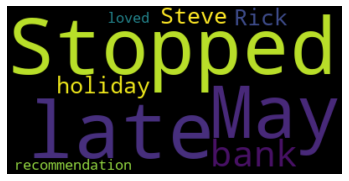

In [56]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

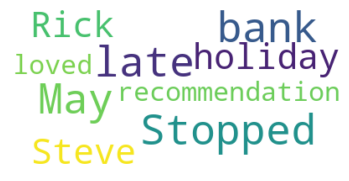

In [57]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
# Do it on all 
text = " ".join(review for review in dataset.Review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 59314 words in the combination of all review.


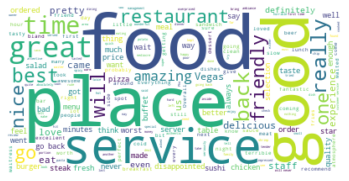

In [59]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Reviews are related to food 

In [60]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [61]:
dataset.head()

Review  \
0                                                                 Wow... Loved this place.   
1                                                                       Crust is not good.   
2                                                Not tasty and the texture was just nasty.   
3  Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                              The selection on the menu was great and so were the prices.   

   Liked  
0      1  
1      0  
2      0  
3      1  
4      1

In [62]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
  
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
#cv = CountVectorizer(max_features = 1500) 
cv = CountVectorizer() 
  
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray() 
  
# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values 

In [63]:
X.shape  # With the Count Vectorizer 

(1000, 1565)

In [64]:
# Logistic Regression Model on Count Vectorizer matrix 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

0.756


In [65]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
  
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
#cv = CountVectorizer(max_features = 1500) 
cv = CountVectorizer(ngram_range=(1,2)) 
  
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray() 
  
# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values 

In [66]:
X.shape

(1000, 5634)

In [67]:
# Logistic Regression Model on Count Vectorizer matrix & uni-gram and bigram
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

0.84


In [ ]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split
  
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# On CV matrix, building a LR mode 
# Training Logistic Regression model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

In [68]:
# tf-idf and bigram
from sklearn.feature_extraction import text
tf=text.TfidfVectorizer(corpus,ngram_range=(1,2))
matrix_tfidf=tf.fit_transform(corpus)

C:\Users\anparash\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', '

In [69]:
X = matrix_tfidf

In [70]:
X.shape

(1000, 5634)

In [ ]:
# Model created with tf-idf and uni+bigram
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

In [ ]:
matrix_tfidf.shape

In [71]:
matrix_tfidf.shape  # This is the matrix created out of the TF-IDF 
# This is the input of SVD/PCA

(1000, 5634)

In [72]:
import sklearn.decomposition as decomposition
svd=decomposition.TruncatedSVD(n_components=50)   #  I need 50 principal components 
matrix_reduced_svd=svd.fit_transform(matrix_tfidf)

In [73]:
X = matrix_reduced_svd

In [74]:
X.shape

(1000, 50)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

0.744


In [ ]:
# Model on the tf-idf, bigram and reduced dimension 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

In [ ]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split
  
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier
  
# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results 
model = RandomForestClassifier(n_estimators = 501,
                            criterion = 'entropy')
                              
model.fit(X_train, y_train) 

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
  
y_pred

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
cm

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
# Training Logistics Regression model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

In [ ]:
# Installing the pre-trained model 
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [ ]:
# Part of Speech tagging ( POS)
# Tag the Entities in the text 
#!pip install spacy
import spacy 
from spacy import displacy
from collections import Counter 
import en_core_web_sm  # Pre trained model 
nlp = spacy.load("C:/Users/anparash/Anaconda/Anaconda3/Lib/site-packages/en_core_web_sm/en_core_web_sm-3.0.0/")

In [ ]:
# from conda 
#python -m spacy download en_core_web_lg
#python -m spacy download en_core_web_sm

In [ ]:
#!pip install en_core_web_sm

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
doc = nlp('European authoraties fined google a record $5.1 billion on Monday for some bad practice')

In [ ]:
print([(X.text, X.label_) for X in doc.ents])

In [ ]:
# In you text - you have a word call "bank" - Interpretation of this word bank is meaningless without context 

In [ ]:
doc = nlp('Anil has 1000 employees')
print([(X.text, X.label_) for X in doc.ents])

In [ ]:
doc = nlp('Anil is working with Google')
print([(X.text, X.label_) for X in doc.ents])

In [ ]:
displacy.render(nlp(str(doc)), jupyter = True, style = 'ent')

In [ ]:
# NER - Named Entity Recognition 

In [ ]:
doc1 = "Bennett Coleman & Co. Ltd was sold to sugar magnate Ramkrishna Dalmia of the then-famous industrial family, the Dalmiyas, for ₹20 million (US$280,000) in 1946, as India was becoming independent and the British owners were leaving.[19] In 1955 the Vivian Bose Commission of Inquiry found that Ramkrishna Dalmia, in 1947, had engineered the acquisition of the media giant Bennett Coleman & Co"

In [ ]:
displacy.render(nlp(str(doc1)), jupyter = True, style = 'ent')